## Prepare Label

- Filter features in GeoJSON by extent
- mapping format from GeoJSON (Copernicus) to WKT (following xBD format)
- convert geographic coordinates to pixel coordinates
- build label_mask

In [2]:
import geopandas as gpd
import os
from shapely.geometry import box
import rasterio

/Users/james/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-2-e5829bc01cdf>:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS direc

In [3]:
# read COPERNICUS geojson into a GeoDataFrame
file_dir = "turkey_earthquake/labels/copernicus_earthquake_turkey_json_02-23/"

#list json files in dir
geojson_list = sorted([file for file in os.listdir(file_dir) if file[-4:]=='json'])
geojson_list[:6]

['EMSR648_AOI01_GRA_MONIT01_builtUpP_r1_v1.json',
 'EMSR648_AOI02_GRA_MONIT01_builtUpA_r1_v1.json',
 'EMSR648_AOI03_GRA_MONIT01_builtUpA_r1_v1.json',
 'EMSR648_AOI04_GRA_MONIT01_builtUpP_r1_v1.json',
 'EMSR648_AOI05_GRA_PRODUCT_builtUpA_r1_v1.json',
 'EMSR648_AOI06_GRA_MONIT01_builtUpA_r1_v2.json']

In [4]:
# test with data in Osmaniye
geojson_file = geojson_list[5]
label_gdf = gpd.read_file(file_dir+geojson_file)
label_gdf.head()

,obj_type,name,info,damage_gra,det_method,notation,or_src_id,dmg_src_id,cd_value,real,geometry
0,11-Residential Buildings,Unknown,997-Not Applicable,No visible damage,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.28462 37.08118, 36.28371 37.08029..."
1,11-Residential Buildings,Unknown,997-Not Applicable,No visible damage,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.25903 37.07408, 36.25875 37.07392..."
2,11-Residential Buildings,Unknown,997-Not Applicable,No visible damage,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.23972 37.07430, 36.23950 37.07419..."
3,11-Residential Buildings,Unknown,997-Not Applicable,No visible damage,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.23130 37.07417, 36.23074 37.07385..."
4,11-Residential Buildings,Unknown,997-Not Applicable,No visible damage,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.23586 37.07416, 36.23555 37.07395..."


In [5]:
label_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   obj_type    2324 non-null   object  
 1   name        2324 non-null   object  
 2   info        2324 non-null   object  
 3   damage_gra  2324 non-null   object  
 4   det_method  2324 non-null   object  
 5   notation    2324 non-null   object  
 6   or_src_id   2324 non-null   int64   
 7   dmg_src_id  2324 non-null   int64   
 8   cd_value    2324 non-null   object  
 9   real        2324 non-null   object  
 10  geometry    2324 non-null   geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 199.8+ KB


In [6]:
label_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
def get_tif_extent(tif_file):
    with rasterio.open(tif_file) as src:
        bounds = src.bounds  # Returns (left, bottom, right, top) coordinates
        crs = src.crs.to_string()
        extent_tuple = (bounds.left, bounds.bottom, bounds.right, bounds.top)
    
    return bounds, crs

filename = "Osmaniye_20221227_10300100DF069700_pre_disaster_0_11.tif"
# filename = "Osmaniye_20230208_10300500D9F8D400_post_disaster_0_11.tif"
tif_path = "turkey_earthquake/images/tile_images/Osmaniye/"+filename

bbox = get_tif_extent(tif_path)[0]
crs = get_tif_extent(tif_path)[1]
print("Raster extent:",bbox,crs)

Raster extent: BoundingBox(left=36.219921077748346, bottom=37.06215547462203, right=36.22305653210699, top=37.06529092898067) EPSG:4326


In [37]:
# new_bbox = tuple(bbox)
# new_bbox

In [38]:
# from rasterio.warp import transform_bounds
# bbox = extent
# src_crs = "EPSG:32637"
# target_crs = "EPSG:4326"
# new_bbox = transform_bounds(src_crs, target_crs, *bbox)
# print("Raster Bounding Box:",new_bbox)

In [39]:
print("Label Bounding Box:",label_gdf.total_bounds)

Label Bounding Box: [36.2188   37.037861 36.287601 37.102086]


In [40]:
label_gdf_bound = gpd.read_file(filename = file_dir+geojson_file,bbox=bbox)
label_gdf_bound

,obj_type,name,info,damage_gra,det_method,notation,or_src_id,dmg_src_id,cd_value,real,geometry
0,11-Residential Buildings,Unknown,997-Not Applicable,No visible damage,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.22305 37.06367, 36.22286 37.06353..."
1,11-Residential Buildings,Unknown,997-Not Applicable,Damaged,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.22167 37.06375, 36.22169 37.06366..."
2,11-Residential Buildings,Unknown,997-Not Applicable,Damaged,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.22037 37.06395, 36.22035 37.06380..."
3,11-Residential Buildings,Unknown,997-Not Applicable,No visible damage,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.22235 37.06388, 36.22237 37.06358..."
4,11-Residential Buildings,Unknown,997-Not Applicable,No visible damage,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.22324 37.06423, 36.22317 37.06393..."
5,11-Residential Buildings,Unknown,997-Not Applicable,Damaged,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.22158 37.06420, 36.22163 37.06394..."
6,11-Residential Buildings,Unknown,997-Not Applicable,Damaged,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.22042 37.06437, 36.22039 37.06414..."
7,11-Residential Buildings,Unknown,997-Not Applicable,Damaged,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.22148 37.06465, 36.22154 37.06439..."
8,11-Residential Buildings,Unknown,997-Not Applicable,Damaged,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.22045 37.06480, 36.22043 37.06456..."
9,11-Residential Buildings,Unknown,997-Not Applicable,No visible damage,Photo-interpretation,Building block,994,3,Not Applicable,Not Applicable,"POLYGON ((36.22341 37.06475, 36.22329 37.06441..."


### Filter polygons/points in GeoJSON by a given bounding box

In [41]:
def get_tif_extent(tif_file):
    with rasterio.open(tif_file) as src:
        bounds = src.bounds  # Returns (left, bottom, right, top) coordinates
        crs = src.crs.to_string()
        extent_tuple = (bounds.left, bounds.bottom, bounds.right, bounds.top)
    
    return bounds, crs

def filter_geodataframe_by_bbox(gdf, bbox):
    # Create a bounding box geometry from the given bbox
    bbox_geom = box(*bbox)
    
#     # Use the spatial index to efficiently filter points within the bounding box
#     filtered_gdf = gdf.cx[bbox_geom.bounds[0]:bbox_geom.bounds[2],
#                            bbox_geom.bounds[1]:bbox_geom.bounds[3]]
    
    filtered_gdf = gpd.clip(label_gdf, bbox_geom)
    
    return filtered_gdf

In [42]:
######## Example usage

## PREPARE RASTER
tif_path = "turkey_earthquake/images/tile_images/Osmaniye/Osmaniye_20221227_10300100DF069700_pre_disaster_0_11.tif"


## PREPARE LABEL
# read COPERNICUS geojson into a GeoDataFrame
file_dir = "turkey_earthquake/labels/copernicus_earthquake_turkey_json_02-23/"
#list json files in dir
geojson_list = sorted([file for file in os.listdir(file_dir) if file[-4:]=='json'])
# read label data in Osmaniye
geojson_file = geojson_list[5]
label_gdf = gpd.read_file(file_dir+geojson_file)

# ## Get Raster Bounding Box and transform crs
# src_crs = "EPSG:32637"
# target_crs = "EPSG:4326"
# bbox = get_tif_extent(tif_path)[0]
# new_bbox = transform_bounds(src_crs, target_crs, *bbox)
# Filter polygons from a bounding box
print("Number of polygons before filtering:",len(label_gdf))
label_gdf_bound = filter_geodataframe_by_bbox(label_gdf,bbox)
print("Number of polygons After filtering:",len(label_gdf_bound))

Number of polygons before filtering: 2324
Number of polygons After filtering: 15


<AxesSubplot:>

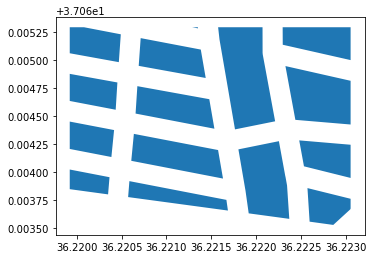

In [43]:
label_gdf_bound.plot()

In [44]:
# write file
write_path = "turkey_earthquake/labels/copernicus_earthquake_turkey_tile_json_02-23/Osmaniye/Osmaniye_20221227_10300100DF069700_pre_disaster_0_11.json"
label_gdf_bound.to_file(write_path, driver="GeoJSON")

### Mapping format from GeoJSON (Copernicus) to WKT (following xBD format)

In [45]:
def geojson_to_wkt(gdf):
    """
    Convert a GeoJSON file to a specific WKT format.
    
    Parameters:
    - gdf: Label GeoDataFrame
    
    Returns:
    - Dictionary containing the converted data in the wkt format.
    """
    
#     # Load the GeoJSON file into a GeoDataFrame
#     gdf = gpd.read_file(input_geojson_path)
    
    # Convert the GeoDataFrame to the desired format
    features_list = []
    for _, row in gdf.iterrows():
        feature_data = {
            "properties": {
                "feature_type": row.get("obj_type", "Unknown"),
                "subtype": row.get("damage_gra", "Unknown"),
                "name": row.get("name", "Unknown"),
                "building_type": row.get("info", "Unknown")
            },
            "wkt": row.geometry.wkt
        }
        features_list.append(feature_data)
    
    # Create the final dictionary structure
    output_data = {
        "features": {
            "lng_lat": features_list
        },
        "metadata": {
            "notation": "Building block"
        }
    }
    
    return output_data

# Convert the provided GeoJSON to the desired WKT format
converted_data = geojson_to_wkt(label_gdf_bound)

# Display the first few entries for review
converted_data["features"]["lng_lat"][:1]


[{'properties': {'feature_type': '11-Residential Buildings',
   'subtype': 'No visible damage',
   'name': 'Unknown',
   'building_type': '997-Not Applicable'},
  'wkt': 'POLYGON ((36.222863 37.06353, 36.222599 37.063559, 36.222575 37.063858, 36.22305653210699 37.06376279213094, 36.22305653210699 37.06367595431022, 36.223052 37.063668, 36.222863 37.06353))'}]

### convert geographic coordinates to pixel coordinates

In [46]:
from shapely.ops import transform
import pyproj
from functools import partial
from shapely import wkt

def convert_to_pixel_coordinates(input_json, extent, image_width, image_height):
    # Extract bounds from the extent parameter
    minx, miny, maxx, maxy = extent
    
    # Input: WKT in geographic coordinates
    wkt_geom = wkt.loads(input_json["wkt"])
    
    # Transformation function: geographic to pixel coordinates
    def transform_to_pixel(x, y, z=None):
        pixel_x = (x - minx) / (maxx - minx) * image_width
        pixel_y = image_height - (y - miny) / (maxy - miny) * image_height
        return pixel_x, pixel_y
    
    # Create a partial function with the transformation
    transformer = partial(transform_to_pixel)
    
    # Apply the transformation
    pixel_geom = transform(transformer, wkt_geom)
    
    # Return the transformed WKT
    return pixel_geom.wkt

def add_pixel_coordinates(input_json, image_width, image_height):
    output_json = input_json.copy()
    output_json["features"]["xy"] = []
    for i in range(len(input_json['features']['lng_lat'])):
        output_json["features"]["xy"].append(input_json["features"]["lng_lat"][i].copy())
        output_json["features"]["xy"][i]["wkt"] = convert_to_pixel_coordinates(input_json["features"]["lng_lat"][i],provided_extent,image_width,image_height)
    return output_json

In [47]:
sample_input = converted_data["features"]["lng_lat"][0]
provided_extent = bbox
print("Input:", sample_input)
print("======")
print("Output:",convert_to_pixel_coordinates(sample_input,provided_extent,1024,1024))

Input: {'properties': {'feature_type': '11-Residential Buildings', 'subtype': 'No visible damage', 'name': 'Unknown', 'building_type': '997-Not Applicable'}, 'wkt': 'POLYGON ((36.222863 37.06353, 36.222599 37.063559, 36.222575 37.063858, 36.22305653210699 37.06376279213094, 36.22305653210699 37.06367595431022, 36.223052 37.063668, 36.222863 37.06353))'}
Output: POLYGON ((960.7948453746807 575.0972809536008, 874.5757622459306 565.626245307383, 866.7376637784149 467.9766019114753, 1024 499.0702957663375, 1024 527.4304369909778, 1022.5198707996957 530.0282147717667, 960.7948453746807 575.0972809536008))


In [48]:
label_wkt = add_pixel_coordinates(converted_data,1024,1024)
label_wkt

{'features': {'lng_lat': [{'properties': {'feature_type': '11-Residential Buildings',
     'subtype': 'No visible damage',
     'name': 'Unknown',
     'building_type': '997-Not Applicable'},
    'wkt': 'POLYGON ((36.222863 37.06353, 36.222599 37.063559, 36.222575 37.063858, 36.22305653210699 37.06376279213094, 36.22305653210699 37.06367595431022, 36.223052 37.063668, 36.222863 37.06353))'},
   {'properties': {'feature_type': '11-Residential Buildings',
     'subtype': 'Damaged',
     'name': 'Unknown',
     'building_type': '997-Not Applicable'},
    'wkt': 'POLYGON ((36.221687 37.063658, 36.220573 37.063778, 36.220587 37.06392, 36.22167 37.063753, 36.221687 37.063658))'},
   {'properties': {'feature_type': '11-Residential Buildings',
     'subtype': 'No visible damage',
     'name': 'Unknown',
     'building_type': '997-Not Applicable'},
    'wkt': 'POLYGON ((36.222372 37.063584, 36.221919 37.063633, 36.221882 37.063842, 36.221881 37.063845, 36.221804 37.064203, 36.222256 37.064276, 

In [49]:
# write file
write_path = "turkey_earthquake/labels/copernicus_earthquake_turkey_tile_wkt_02-23/Osmaniye/Osmaniye_20221227_10300100DF069700_pre_disaster_0_11.json"
with open(write_path, "w") as outfile:
    json.dump(label_wkt,outfile)

## Prepare label metadata

In [59]:
file_dir = "turkey_earthquake/labels/copernicus_earthquake_turkey_json_02-23/"
#list json files in dir
geojson_list = sorted([file for file in os.listdir(file_dir) if file[-4:]=='json'])
geojson_list[:5]

['EMSR648_AOI01_GRA_MONIT01_builtUpP_r1_v1.json',
 'EMSR648_AOI02_GRA_MONIT01_builtUpA_r1_v1.json',
 'EMSR648_AOI03_GRA_MONIT01_builtUpA_r1_v1.json',
 'EMSR648_AOI04_GRA_MONIT01_builtUpP_r1_v1.json',
 'EMSR648_AOI05_GRA_PRODUCT_builtUpA_r1_v1.json']

In [62]:
import pandas as pd
metadata_df = pd.read_csv('turkey_earthquake/labels/turkey_earthquake_copernicus_metadata.csv')
metadata_df.head()

,AOIno,AOIname,Area(km2),Estimated population,Production status,Affected roads (km),Affected buildings,Label Format
0,1,Gaziantep,126,1191034,Completed,0.0,72,Point
1,2,Adiyaman,62,209256,Completed,12.0,83,Block
2,3,Diyarbakir,52,562481,Completed,NaN,64,Block
3,4,Kahramanmaras,56,384404,Completed,21.0,927,Point
4,5,Malatya,87,423295,Completed,6.0,229,Block


In [63]:
metadata_df['Filename'] = geojson_list
metadata_df.head()

,AOIno,AOIname,Area(km2),Estimated population,Production status,Affected roads (km),Affected buildings,Label Format,filename
0,1,Gaziantep,126,1191034,Completed,0.0,72,Point,EMSR648_AOI01_GRA_MONIT01_builtUpP_r1_v1.json
1,2,Adiyaman,62,209256,Completed,12.0,83,Block,EMSR648_AOI02_GRA_MONIT01_builtUpA_r1_v1.json
2,3,Diyarbakir,52,562481,Completed,NaN,64,Block,EMSR648_AOI03_GRA_MONIT01_builtUpA_r1_v1.json
3,4,Kahramanmaras,56,384404,Completed,21.0,927,Point,EMSR648_AOI04_GRA_MONIT01_builtUpP_r1_v1.json
4,5,Malatya,87,423295,Completed,6.0,229,Block,EMSR648_AOI05_GRA_PRODUCT_builtUpA_r1_v1.json


In [64]:
# #write file
# metadata_df.to_csv('turkey_earthquake/labels/turkey_earthquake_copernicus_metadata.csv',index=False)

# Prepare Label Script

In [80]:
from shapely.ops import transform
import pyproj
from functools import partial
from shapely import wkt
import pandas as pd

def get_tif_extent(tif_file):
    with rasterio.open(tif_file) as src:
        bounds = src.bounds  # Returns (left, bottom, right, top) coordinates
        crs = src.crs.to_string()
        extent_tuple = (bounds.left, bounds.bottom, bounds.right, bounds.top)
    
    return bounds, crs

def filter_geodataframe_by_bbox(gdf, bbox):
    # Create a bounding box geometry from the given bbox
    bbox_geom = box(*bbox)
    filtered_gdf = gpd.clip(label_gdf, bbox_geom)
    
    return filtered_gdf

def geojson_to_wkt(gdf):
    """
    Convert a GeoJSON file to a specific WKT format.
    
    Parameters:
    - gdf: Label GeoDataFrame
    
    Returns:
    - Dictionary containing the converted data in the wkt format.
    """
    
#     # Load the GeoJSON file into a GeoDataFrame
#     gdf = gpd.read_file(input_geojson_path)
    
    # Convert the GeoDataFrame to the desired format
    features_list = []
    for _, row in gdf.iterrows():
        feature_data = {
            "properties": {
                "feature_type": row.get("obj_type", "Unknown"),
                "subtype": row.get("damage_gra", "Unknown"),
                "name": row.get("name", "Unknown"),
                "building_type": row.get("info", "Unknown")
            },
            "wkt": row.geometry.wkt
        }
        features_list.append(feature_data)
    
    # Create the final dictionary structure
    output_data = {
        "features": {
            "lng_lat": features_list
        },
        "metadata": {
            "notation": "Building block"
        }
    }
    
    return output_data

def convert_to_pixel_coordinates(input_json, extent, image_width, image_height):
    # Extract bounds from the extent parameter
    minx, miny, maxx, maxy = extent
    
    # Input: WKT in geographic coordinates
    wkt_geom = wkt.loads(input_json["wkt"])
    
    # Transformation function: geographic to pixel coordinates
    def transform_to_pixel(x, y, z=None):
        pixel_x = (x - minx) / (maxx - minx) * image_width
        pixel_y = image_height - (y - miny) / (maxy - miny) * image_height
        return pixel_x, pixel_y
    
    # Create a partial function with the transformation
    transformer = partial(transform_to_pixel)
    
    # Apply the transformation
    pixel_geom = transform(transformer, wkt_geom)
    
    # Return the transformed WKT
    return pixel_geom.wkt

def add_pixel_coordinates(input_json,provided_extent, image_width, image_height):
    output_json = input_json.copy()
    output_json["features"]["xy"] = []
    for i in range(len(input_json['features']['lng_lat'])):
        output_json["features"]["xy"].append(input_json["features"]["lng_lat"][i].copy())
        output_json["features"]["xy"][i]["wkt"] = convert_to_pixel_coordinates(input_json["features"]["lng_lat"][i],provided_extent,image_width,image_height)
    return output_json

def list_subdirectories(directory_path):
    subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]
    return subdirectories

def list_tiff_files(directory_path):
    tiff_files = [file for file in os.listdir(directory_path) if file.endswith('.tif') or file.endswith('.tiff')]
    return tiff_files

In [82]:
%%time
from tqdm import tqdm
from pathlib import Path
import warnings
warnings.simplefilter("ignore", UserWarning) # it will warn when there is no building in the file so we can ignore it
file_dir = "turkey_earthquake/labels/copernicus_earthquake_turkey_json_02-23/"
file_tile_json_dir = "turkey_earthquake/labels/copernicus_earthquake_turkey_tile_json_02-23/"
file_tile_wkt_dir = "turkey_earthquake/labels/copernicus_earthquake_turkey_tile_wkt_02-23/"
tif_dir = "turkey_earthquake/images/tile_images/"
# label metadata
metadata_df = pd.read_csv('turkey_earthquake/labels/turkey_earthquake_copernicus_metadata.csv')
# Get All cities
city_list = list_subdirectories(tif_dir)
# COPERNICUS geojson
geojson_list = sorted([file for file in os.listdir(file_dir) if file[-4:]=='json'])

# Ensure the directories exist
Path(file_tile_json_dir).mkdir(exist_ok=True)
Path(file_tile_wkt_dir).mkdir(exist_ok=True)

# Run by city
for city in tqdm(city_list):
    # Ensure the directories exist
    Path(file_tile_json_dir+city+'/').mkdir(exist_ok=True)
    Path(file_tile_wkt_dir+city+'/').mkdir(exist_ok=True)
    ## PREPARE LABEL
    # query label filename using city
    geojson_file = metadata_df[metadata_df['AOIname']== city]["Filename"].values[0]
    # read COPERNICUS geojson into a GeoDataFrame
    label_gdf = gpd.read_file(file_dir+geojson_file)
    
    ## List all tif files in this city
    tif_filenames = list_tiff_files(tif_dir+city)

    for filename in tif_filenames:
        #### Get TIF Bounding Boxes ####
        tif_path = tif_dir+city+'/'+filename
        bbox = get_tif_extent(tif_path)[0]

        ### Filter polygons/points in GeoJSON by a given bounding box ###
        label_gdf_bound = filter_geodataframe_by_bbox(label_gdf,bbox)
        # write file
        write_json_path = file_tile_json_dir+city+'/'+filename.replace('.tif','.json')
        label_gdf_bound.to_file(write_json_path, driver="GeoJSON")
        
        # Convert the provided GeoJSON to the desired WKT format
        converted_data = geojson_to_wkt(label_gdf_bound)
        # include pixel coordinates
        label_wkt = add_pixel_coordinates(converted_data,bbox,1024,1024)
        # write file
        write_wkt_path = file_tile_wkt_dir+city+'/'+filename.replace('.tif','.json')
        with open(write_wkt_path, "w") as outfile:
            json.dump(label_wkt,outfile)

100%|██████████| 1/1 [00:06<00:00,  6.79s/it]

CPU times: user 6.27 s, sys: 375 ms, total: 6.64 s
Wall time: 6.8 s
